Introduction
====================

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())
print(recent_grads.describe())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

In [3]:
# to count the number of rows in 'recent_grads', both ways are ok
raw_data_count = len(recent_grads.index)
recent_grads.shape

(173, 21)

In [4]:
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads.index)
cleaned_data_count

172

Pandas, Scatter Plots
====================

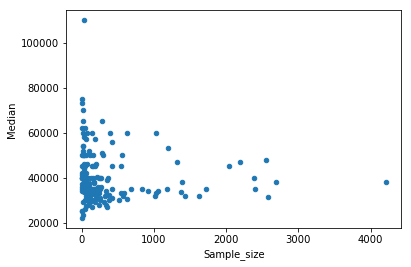

In [5]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

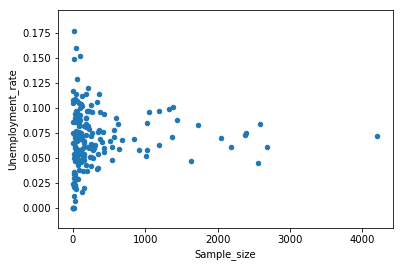

In [6]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

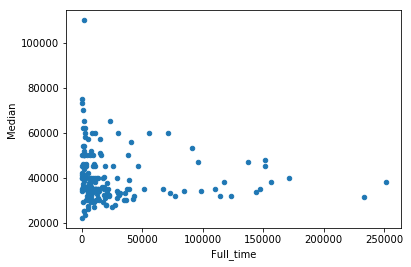

In [7]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

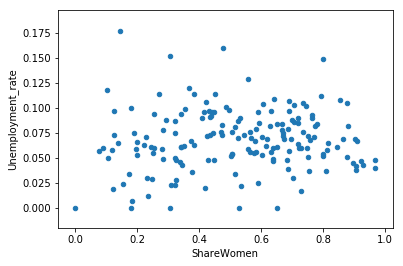

In [8]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

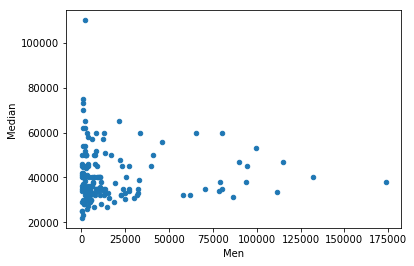

In [9]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

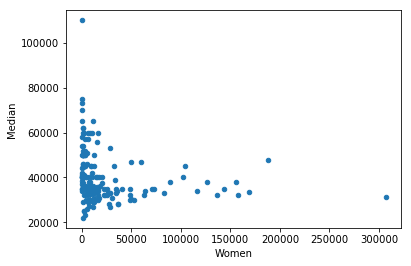

In [10]:
recent_grads.plot(x='Women', y='Median', kind='scatter')

### Further questions:
1) Do students in more popular majors make more money?

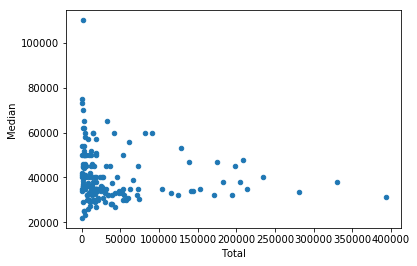

In [11]:
recent_grads.plot(x='Total', y='Median', kind='scatter')

2) Do students that majored in subjects that were majority female make more money?

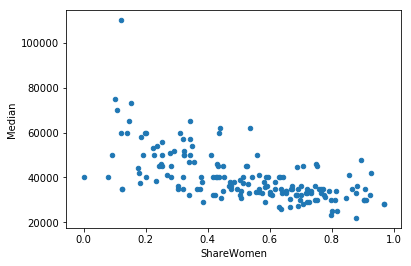

In [12]:
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')

3) Is there any link between the number of full-time employees and median salary?

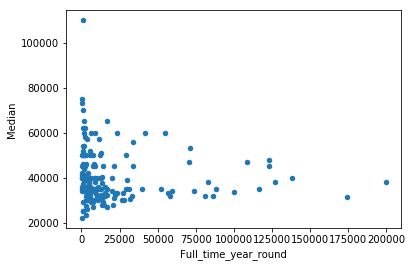

In [13]:
recent_grads.plot(x='Full_time_year_round', y='Median', kind='scatter')

# Pandas, Histograms

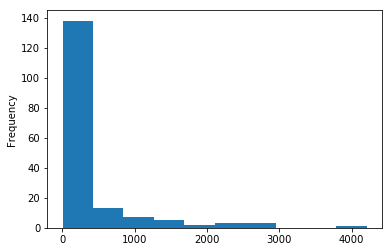

In [18]:
recent_grads['Sample_size'].plot(kind='hist')

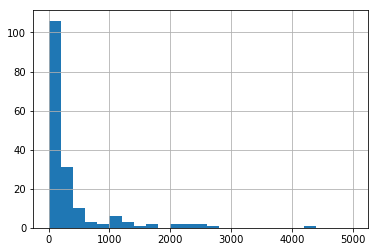

In [19]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

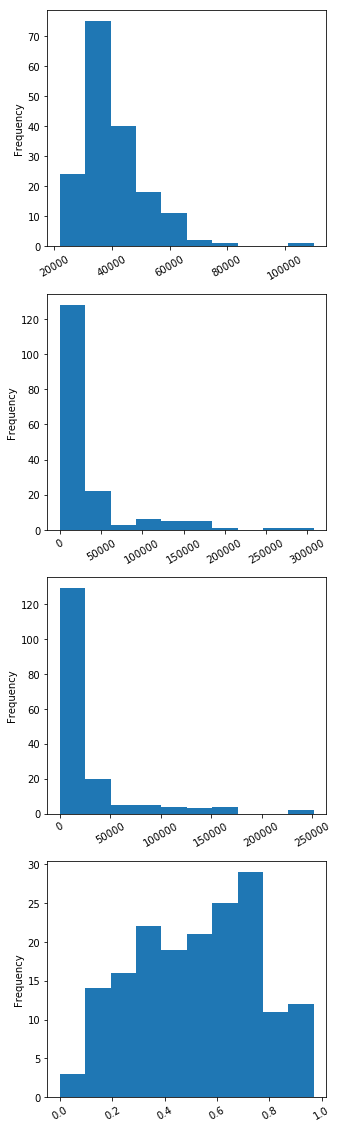

In [31]:
cols = ['Sample_size', 'Median', 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Women']
fig = plt.figure(figsize=(5,20))
for i in range(1,5):
    ax = fig.add_subplot(4,1,i)
    ax = recent_grads[cols[i]].plot(kind='hist', rot=30)

### Further questions:
1) What percent of major are predominantly male? Predominantly female?
- if we say 0.8+ of 'WomenShare' is predominantly female, about 12.6% of major are predominantly female. If we say below 0.2 of 'WomenShare' is predominantly male, about 9.3% of major are predominantly male.

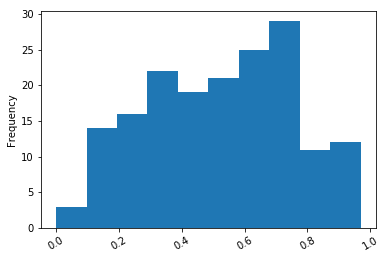

In [52]:
recent_grads['ShareWomen'].plot(kind='hist', rot=30)

2) What's the most common median salary range?
- According to the histogram below, the salary range between 30,000 and 40,000 is the most common.

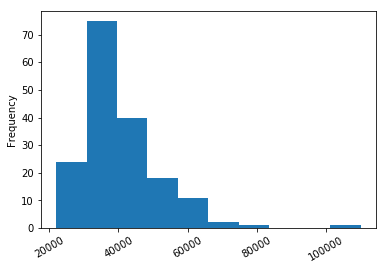

In [53]:
recent_grads['Median'].plot(kind='hist', rot=30)

# Pandas, Scatter Maxtrix Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000EBEF0A9D68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000EBEFDDE588>]], dtype=object)

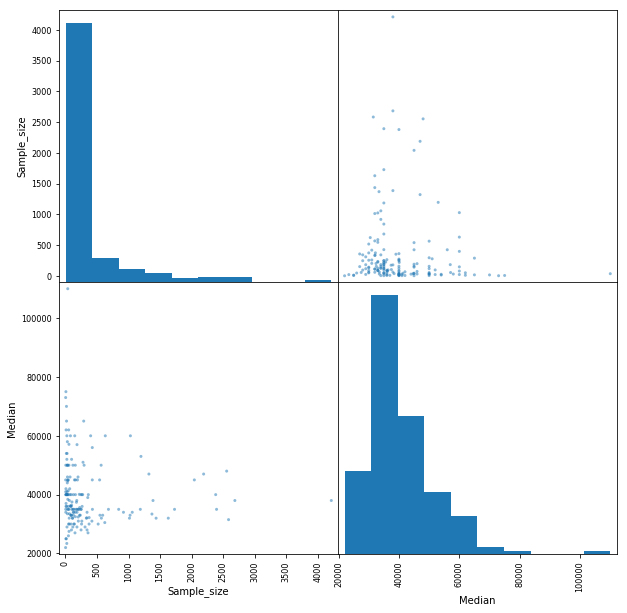

In [59]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000EBEFF1B7F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000EBF05CED68>]], dtype=object)

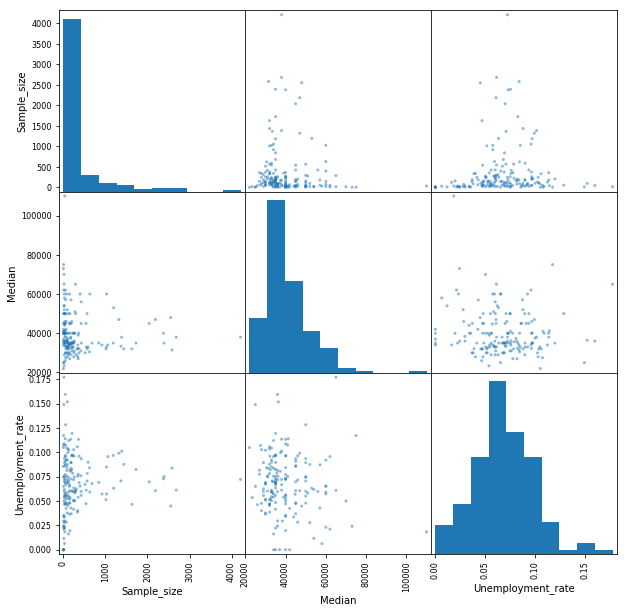

In [60]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000EBF11E7828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000EBF1672E80>]], dtype=object)

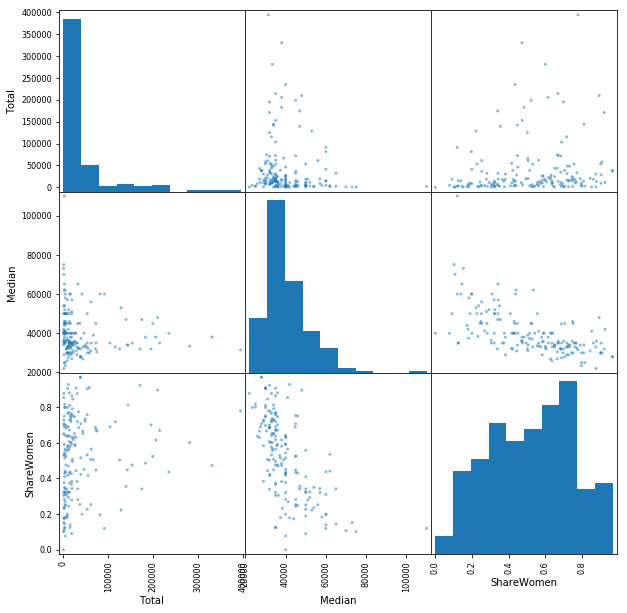

In [62]:
scatter_matrix(recent_grads[['Total', 'Median', 'ShareWomen']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000EBF27DD240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000EBF2D49BA8>]], dtype=object)

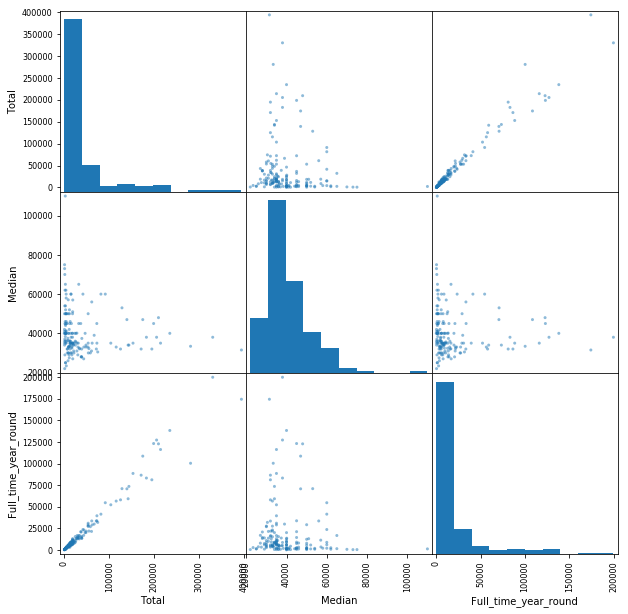

In [63]:
scatter_matrix(recent_grads[['Total', 'Median', 'Full_time_year_round']], figsize=(10,10))

# Pandas, Bar Plots

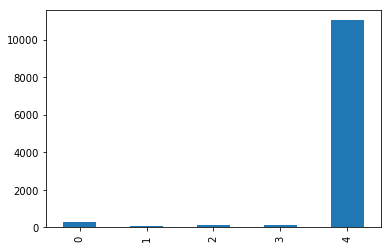

In [64]:
recent_grads[:5]['Women'].plot(kind='bar')

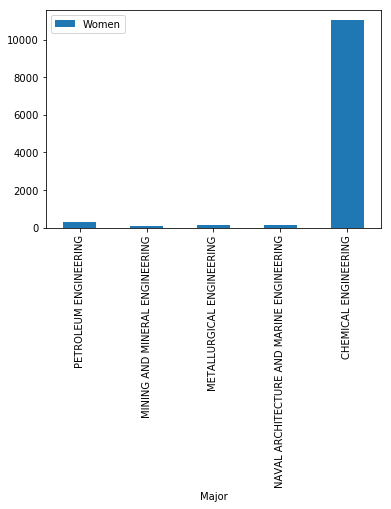

In [65]:
recent_grads[:5].plot.bar(x='Major', y='Women')

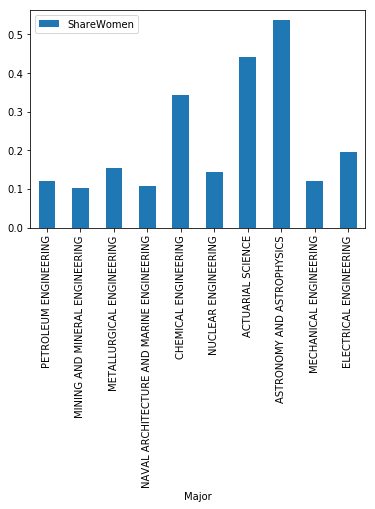

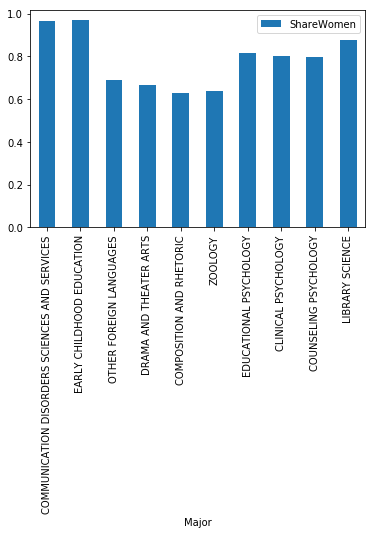

In [69]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')

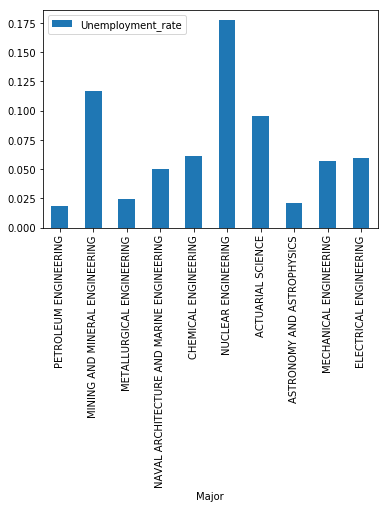

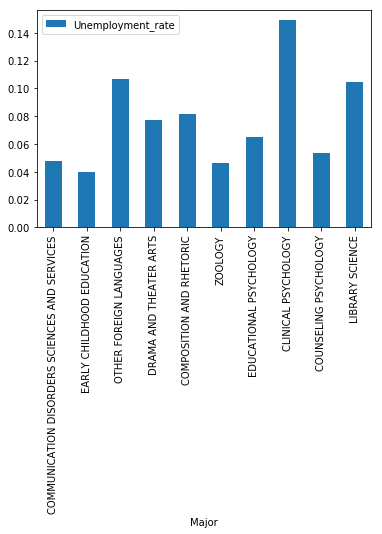

In [70]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')

### Further ideas
1) a grouped bar plot to compare the number of men with the number of women in each category of majors

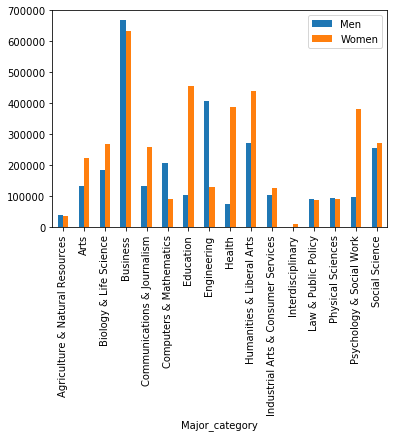

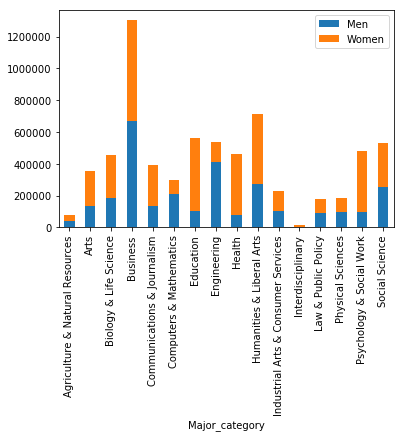

In [82]:
import numpy as np

tbl = recent_grads.pivot_table(index='Major_category', values=['Men','Women'],aggfunc=np.sum)
tbl.plot.bar(x=tbl.index,y=['Men','Women'])
tbl.plot.bar(x=tbl.index,y=['Men','Women'], stacked=True)

2) A box plot to explore the distributions of median salaries and unemployment rate

(0, 120000)

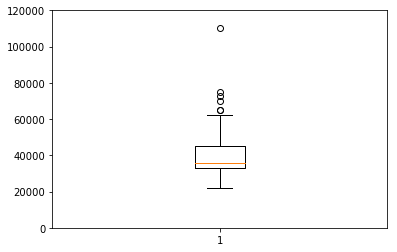

In [91]:
fig, ax = plt.subplots()
ax.boxplot(recent_grads['Median'])
ax.set_ylim(0,120000)

{'boxes': [<matplotlib.lines.Line2D at 0xebf8030cf8>],
 'caps': [<matplotlib.lines.Line2D at 0xebf8044710>,
 'fliers': [<matplotlib.lines.Line2D at 0xebf804bf98>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xebf804b128>],
 'whiskers': [<matplotlib.lines.Line2D at 0xebf8030eb8>,
  <matplotlib.lines.Line2D at 0xebf803deb8>]}

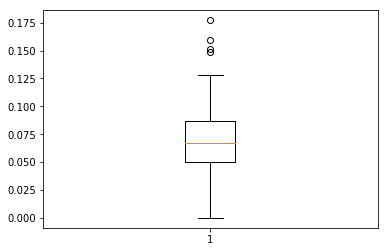

In [93]:
fig, ax = plt.subplots()
ax.boxplot(recent_grads['Unemployment_rate'])

3) A hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project

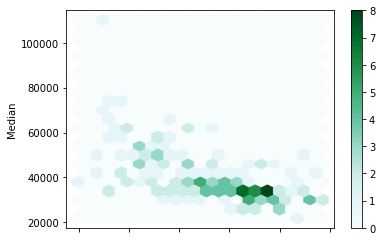

In [106]:
recent_grads.plot.hexbin(x='ShareWomen', y='Median', gridsize=20)

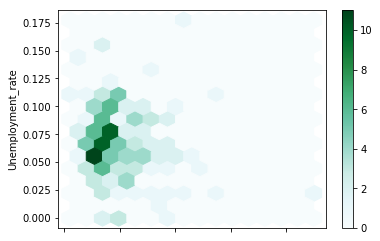

In [114]:
recent_grads.plot.hexbin(x='Median', y='Unemployment_rate', gridsize=15)